In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib.pyplot import figure
from statsmodels.stats.outliers_influence import OLSInfluence

In [2]:
market_df = pd.read_excel('Market_Portfolio.xlsx')
industry_df = pd.read_excel('Industry_Portfolios.xlsx')

/Users/User2/opt/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:300: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
treynor_market_mean = market_df.mean()[1]
industry_df_treynor = industry_df.iloc[:,1:].copy()

In [4]:
market_df.mean()

Date      200856.500000
Market         0.748083
dtype: float64

In [5]:
market_df2 = market_df[['Market']].copy()-0.13

In [6]:
industry_df2 = industry_df.iloc[:,1:].copy()-0.13
industry_df2.mean()

NoDur    0.772833
Durbl    0.603333
Manuf    0.882833
Enrgy    1.101167
HiTec    0.636250
Telcm    0.751417
Shops    0.786333
Hlth     0.653833
Utils    0.777167
Other    0.359083
dtype: float64

/Users/User2/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                  NoDur   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     299.2
Date:                Thu, 04 Nov 2021   Prob (F-statistic):           3.76e-34
Time:                        09:31:51   Log-Likelihood:                -238.91
No. Observations:                 120   AIC:                             481.8
Df Residuals:                     118   BIC:                             487.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3694      0.165      2.242      0.0

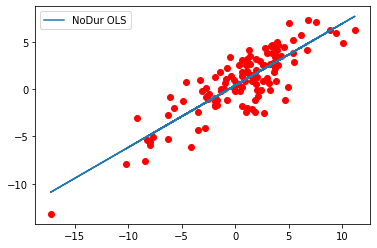

In [7]:
#for 1 result only
dep_var = industry_df2['NoDur']
indep_var = market_df2
indep_var_const = sm.add_constant(market_df2)

model = sm.OLS(dep_var,indep_var_const)
result = model.fit()
print(result.summary())

my_plot = plt.figure()
my_plot = plt.plot(indep_var,dep_var,'ro')
my_plot = plt.plot(indep_var,result.fittedvalues, label = 'NoDur OLS')
plt.legend()

standardized_residuals = result.get_influence().resid_studentized_internal

In [8]:
my_columns = ['Industry','Intercept','Slope']
params_table = pd.DataFrame(columns = my_columns)

def Ols_result(dependent_df,independent_df,params_table):
    for x in dependent_df.columns:
        dep_var = dependent_df[x]
        indep_var = independent_df
        indep_var_const = sm.add_constant(independent_df)
        
        model = sm.OLS(dep_var,indep_var_const)
        result = model.fit()
        
        a,b = result.params
        params_table = params_table.append(pd.Series([x,a,b],index=my_columns),ignore_index=True)
        
        print(result.summary())
        display(result.params)
        
        my_plot = plt.figure()
        my_plot = plt.plot(indep_var,dep_var,'ro')
        my_plot = plt.plot(indep_var,result.fittedvalues, label = f'{x}')
        plt.legend()
        
    return (params_table)

                            OLS Regression Results                            
Dep. Variable:                  NoDur   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     299.2
Date:                Thu, 04 Nov 2021   Prob (F-statistic):           3.76e-34
Time:                        09:31:51   Log-Likelihood:                -238.91
No. Observations:                 120   AIC:                             481.8
Df Residuals:                     118   BIC:                             487.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3694      0.165      2.242      0.0

/Users/User2/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const     0.369443
Market    0.652647
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  Durbl   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     323.2
Date:                Thu, 04 Nov 2021   Prob (F-statistic):           1.38e-35
Time:                        09:31:51   Log-Likelihood:                -345.49
No. Observations:                 120   AIC:                             695.0
Df Residuals:                     118   BIC:                             700.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4156      0.400     -1.038      0.3

/Users/User2/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const    -0.415599
Market    1.648536
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  Manuf   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     1265.
Date:                Thu, 04 Nov 2021   Prob (F-statistic):           6.69e-65
Time:                        09:31:52   Log-Likelihood:                -222.47
No. Observations:                 120   AIC:                             448.9
Df Residuals:                     118   BIC:                             454.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1598      0.144      1.112      0.2

/Users/User2/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const     0.159771
Market    1.169846
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  Enrgy   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     108.6
Date:                Thu, 04 Nov 2021   Prob (F-statistic):           1.99e-18
Time:                        09:31:52   Log-Likelihood:                -347.25
No. Observations:                 120   AIC:                             698.5
Df Residuals:                     118   BIC:                             704.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5017      0.406      1.235      0.2

/Users/User2/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const     0.501719
Market    0.969850
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  HiTec   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     599.0
Date:                Thu, 04 Nov 2021   Prob (F-statistic):           4.66e-48
Time:                        09:31:52   Log-Likelihood:                -263.45
No. Observations:                 120   AIC:                             530.9
Df Residuals:                     118   BIC:                             536.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0640      0.202     -0.317      0.7

/Users/User2/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const    -0.064020
Market    1.132969
dtype: float64

/Users/User2/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                  Telcm   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     401.2
Date:                Thu, 04 Nov 2021   Prob (F-statistic):           9.01e-40
Time:                        09:31:52   Log-Likelihood:                -259.97
No. Observations:                 120   AIC:                             523.9
Df Residuals:                     118   BIC:                             529.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1947      0.196      0.991      0.3

const     0.194691
Market    0.900729
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  Shops   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     391.0
Date:                Thu, 04 Nov 2021   Prob (F-statistic):           2.93e-39
Time:                        09:31:52   Log-Likelihood:                -251.20
No. Observations:                 120   AIC:                             506.4
Df Residuals:                     118   BIC:                             512.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2755      0.183      1.509      0.1

/Users/User2/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const     0.275492
Market    0.826492
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                   Hlth   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     173.5
Date:                Thu, 04 Nov 2021   Prob (F-statistic):           6.33e-25
Time:                        09:31:52   Log-Likelihood:                -275.30
No. Observations:                 120   AIC:                             554.6
Df Residuals:                     118   BIC:                             560.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2378      0.223      1.066      0.2

/Users/User2/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const     0.237841
Market    0.673036
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  Utils   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     78.08
Date:                Thu, 04 Nov 2021   Prob (F-statistic):           1.11e-14
Time:                        09:31:52   Log-Likelihood:                -296.36
No. Observations:                 120   AIC:                             596.7
Df Residuals:                     118   BIC:                             602.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4446      0.266      1.672      0.0

/Users/User2/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const     0.444585
Market    0.538086
dtype: float64

                            OLS Regression Results                            
Dep. Variable:                  Other   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     877.7
Date:                Thu, 04 Nov 2021   Prob (F-statistic):           1.75e-56
Time:                        09:31:52   Log-Likelihood:                -248.16
No. Observations:                 120   AIC:                             500.3
Df Residuals:                     118   BIC:                             505.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3871      0.178     -2.175      0.0

/Users/User2/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const    -0.387135
Market    1.207309
dtype: float64

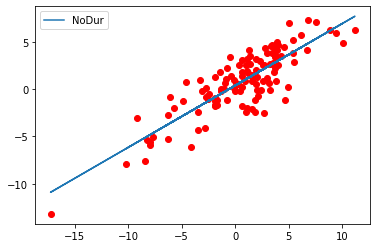

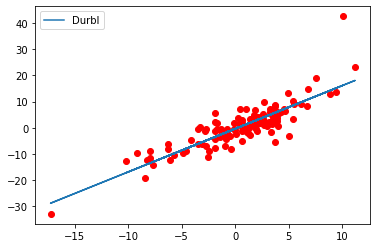

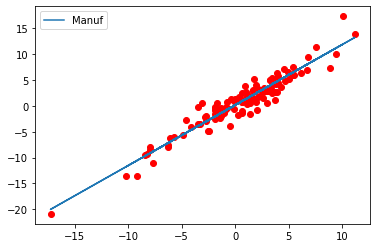

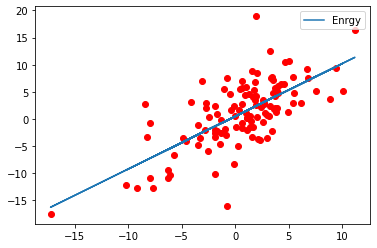

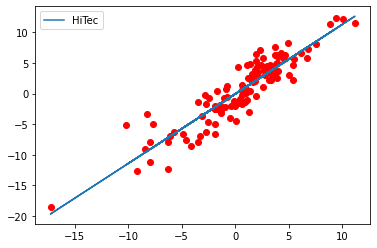

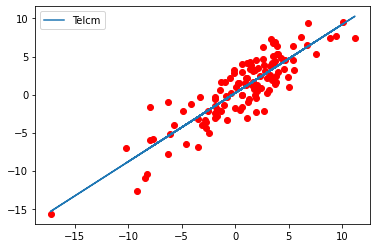

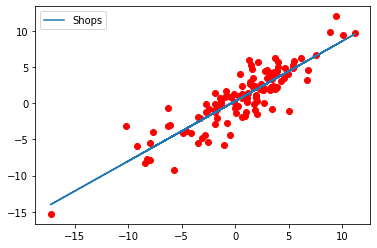

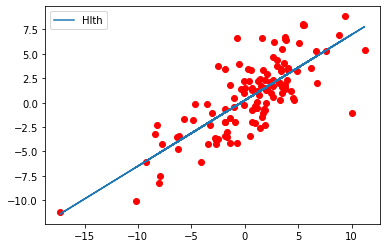

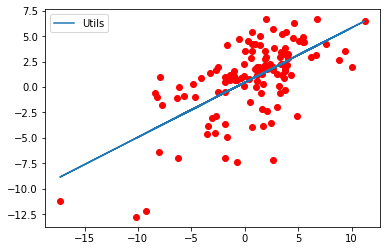

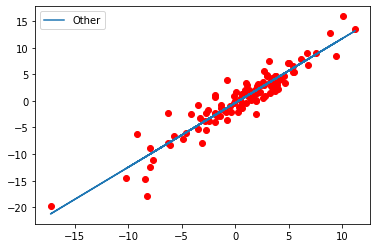

In [9]:
params_table1 = Ols_result(industry_df2,market_df2,params_table)

In [10]:
params_table1

,Industry,Intercept,Slope
0,NoDur,0.369443,0.652647
1,Durbl,-0.415599,1.648536
2,Manuf,0.159771,1.169846
3,Enrgy,0.501719,0.969850
4,HiTec,-0.064020,1.132969
5,Telcm,0.194691,0.900729
6,Shops,0.275492,0.826492
7,Hlth,0.237841,0.673036
8,Utils,0.444585,0.538086
9,Other,-0.387135,1.207309


/Users/User2/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/User2/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
No handles with labels found to put in legend.


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.9679
Date:                Thu, 04 Nov 2021   Prob (F-statistic):              0.351
Time:                        09:31:54   Log-Likelihood:                 3.9339
No. Observations:                  11   AIC:                            -3.868
Df Residuals:                       9   BIC:                            -3.072
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0328      0.192      5.374      0.0

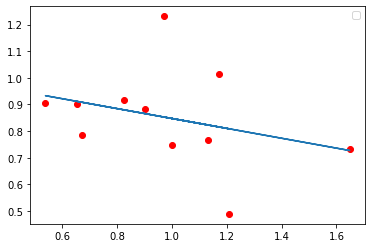

In [11]:
treynor_mean_df = industry_df_treynor.mean()
treynor_mean_df.loc['Market'] = treynor_market_mean

indep_var_df = params_table1['Slope']
indep_var_df.loc[10] = 1
indep_var_const = sm.add_constant(indep_var_df)

model2 = sm.OLS(np.array(treynor_mean_df),indep_var_const)
result2 = model2.fit()
print(result2.summary())
print(result2.params)

my_plot = plt.figure()
my_plot = plt.plot(indep_var_df,treynor_mean_df,'ro')
my_plot = plt.plot(indep_var_df,result2.fittedvalues)
plt.legend()

In [12]:
sml_coef, sml_slope = result2.params

In [13]:
result2.params

const    1.032768
Slope   -0.185467
dtype: float64

In [14]:
sml_upper_point_y = sml_slope*2 + sml_coef

Text(0.5, 1.0, 'SML')

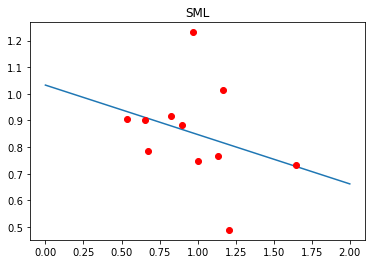

In [15]:
y = [sml_coef,sml_upper_point_y]
x = [0,2]

plt.figure()
plt.plot(x,y)
plt.plot(indep_var_df,treynor_mean_df,'ro')
plt.title('SML')